In [2]:
import pandas as pd
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("C:/Users/noelm/Downloads/51680512442_688a4a563e_o.jpg")

In [4]:
#Mean filter
mean_kernel = np.ones((5,5),np.float32)/25
mean_filtered = cv2.filter2D(img,-1,mean_kernel)

#Gaussian filter
gaussian_filtered = cv2.GaussianBlur(img,(5,5),0)

#sobel filter
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sobel_filtered = np.hypot(sobelx,sobely)

#Laplacian filter
laplacian_filtered = cv2.Laplacian(img,cv2.CV_64F)

#median filter
median_filtered = cv2.medianBlur(img,5)

#bilateral filter
bilateral_filtered = cv2.bilateralFilter(img,9,75,75)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..10681.307129747744].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-372.0..332.0].


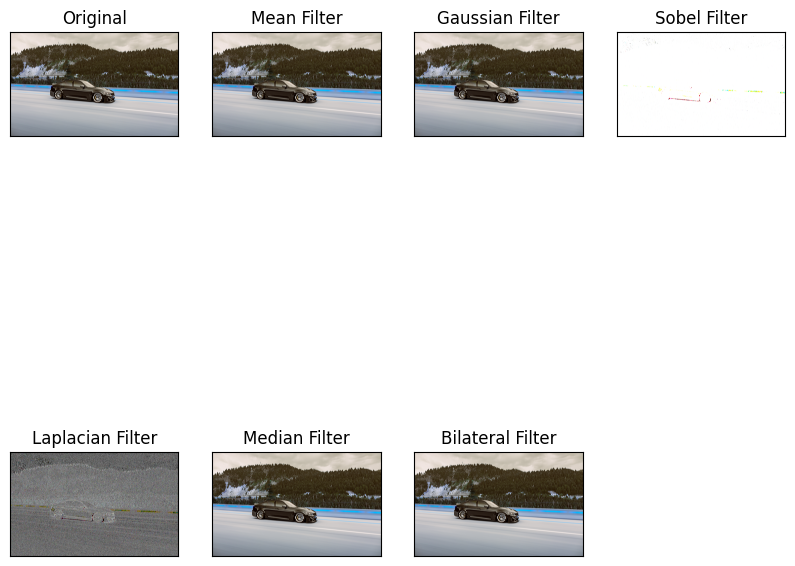

In [5]:
#display results

titles = ['Original','Mean Filter','Gaussian Filter','Sobel Filter','Laplacian Filter','Median Filter','Bilateral Filter']
images = [img,mean_filtered,gaussian_filtered,sobel_filtered,laplacian_filtered,median_filtered,bilateral_filtered]

plt.figure(figsize=(10,10))
for i in range(7):
  plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()


In [35]:
import tensorflow as tf
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2

In [36]:
import tensorflow as tf
import keras
import cv2

 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Reshape the data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [37]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (28, 28))
            images.append(img)
            # Assuming the filename format is label_imgnum.png, e.g., 5_123.png
            label = int(filename.split('_')[0])
            labels.append(label)
    return np.array(images), np.array(labels)


In [38]:
def apply_mean_filter(images):
    filtered_images = []
    for image in images:
        filtered_image = cv2.blur(image, (3, 3))
        filtered_images.append(filtered_image)
    return np.array(filtered_images)

# Apply median filter using OpenCV
def apply_median_filter(images):
    filtered_images = []
    for image in images:
        filtered_image = cv2.medianBlur(image, 3)
        filtered_images.append(filtered_image)
    return np.array(filtered_images)

In [39]:
# Apply mean and median filtering
x_train_mean_filtered = apply_mean_filter(x_train)
x_test_mean_filtered = apply_mean_filter(x_test)
x_train_median_filtered = apply_median_filter(x_train)
x_test_median_filtered = apply_median_filter(x_test)

In [40]:
# Flatten the images for SVM
x_train_mean_flat = x_train_mean_filtered.reshape(x_train_mean_filtered.shape[0], -1)
x_test_mean_flat = x_test_mean_filtered.reshape(x_test_mean_filtered.shape[0], -1)
x_train_median_flat = x_train_median_filtered.reshape(x_train_median_filtered.shape[0], -1)
x_test_median_flat = x_test_median_filtered.reshape(x_test_median_filtered.shape[0], -1)

# Applying

In [ ]:
# Flatten the images for SVM
x_train_mean_flat = x_train.reshape(x_train.shape[0], -1)
x_test_mean_flat = x_test.reshape(x_test.shape[0], -1)
x_train_median_flat = x_train.reshape(x_train.shape[0], -1)
x_test_median_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
# Define and train SVM model
def train_svm(x_train, y_train):
    svm = SVC(kernel='linear')
    svm.fit(x_train, y_train)
    return svm

# Train SVM on mean filtered images
svm_mean = train_svm(x_train_mean_flat, y_train)

# Train SVM on median filtered images
svm_median = train_svm(x_train_median_flat, y_train)

# Evaluate the SVM models
def evaluate_svm(svm, x_test, y_test):
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Evaluate the mean filtered SVM
accuracy_mean = evaluate_svm(svm_mean, x_test_mean_flat, y_test)
print(f'Mean Filtered SVM Accuracy: {accuracy_mean:.4f}')

# Evaluate the median filtered SVM
accuracy_median = evaluate_svm(svm_median, x_test_median_flat, y_test)
print(f'Median Filtered SVM Accuracy: {accuracy_median:.4f}')

Mean Filtered SVM Accuracy: 0.9404
Median Filtered SVM Accuracy: 0.9404


In [11]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data
y = mnist.target.astype(int)

In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=50)
x_pca = pca.fit_transform(X_scaled)

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_pca)
clusters = kmeans.labels_

In [9]:
labels = np.zeros_like(clusters)
for i in range(n_clusters):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

accuracy = accuracy_score(y, labels)
print(f'K-Means Clustering Accuracy: {accuracy:.4f}')



K-Means Clustering Accuracy: 0.4905


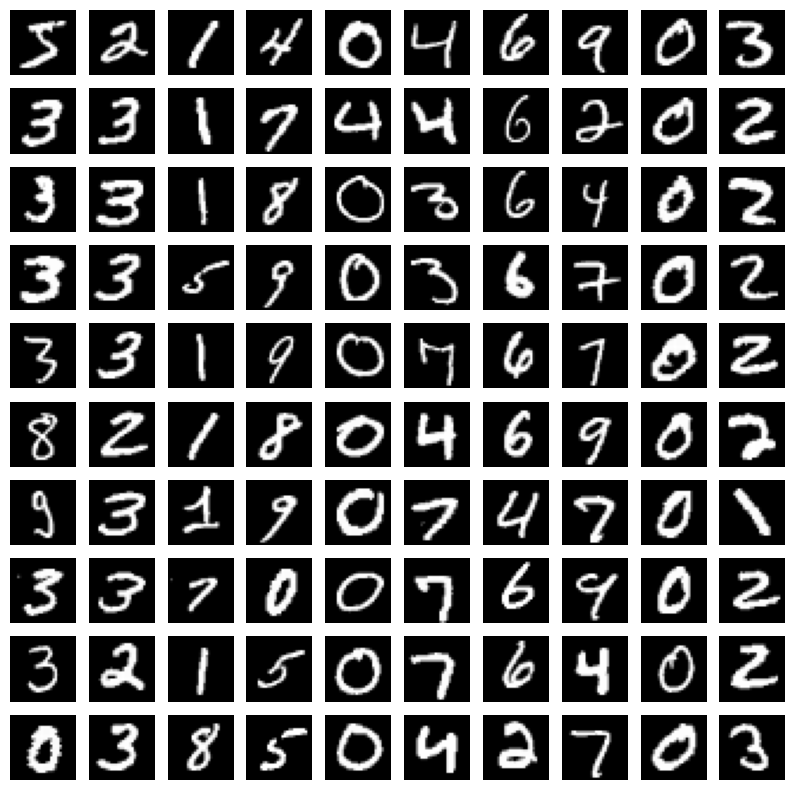

In [12]:
def plot_digits (data, clusters , n_digits=10):
    fig, axes = plt.subplots(n_digits, n_clusters, figsize=(n_clusters, n_digits))
    for i in range(n_digits):
        for j in range(n_clusters):
            axes[i, j].imshow(data[clusters == j][i].reshape(28, 28), cmap='gray')
            axes[i, j].axis('off')
    plt.show()

plot_digits(X.values, clusters)

In [13]:
wrong_counts = np.zeros(n_clusters, dtype=int)
for i in range(n_clusters):
    mask = (clusters == i)
    # Count misclassifications within each cluster label
    wrong_counts[i] = np.sum(labels[mask] != y[mask])

# Print number of misclassifications per class
for i in range(n_clusters):
    print(f'Cluster {i} - Wrongly Classified: {wrong_counts[i]}')


Cluster 0 - Wrongly Classified: 7091
Cluster 1 - Wrongly Classified: 1642
Cluster 2 - Wrongly Classified: 4882
Cluster 3 - Wrongly Classified: 7296
Cluster 4 - Wrongly Classified: 721
Cluster 5 - Wrongly Classified: 2074
Cluster 6 - Wrongly Classified: 1607
Cluster 7 - Wrongly Classified: 8460
Cluster 8 - Wrongly Classified: 455
Cluster 9 - Wrongly Classified: 1434
